In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import nltk
import spacy
import re

import en_core_web_sm
nlp = en_core_web_sm.load()

In [2]:
x = pd.read_csv('after_eda_audible.csv')
x.head()

,name,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
0,Geronimo Stilton #11 & #12,140,5.0,468.0,34.0,2008,8,0,1,0,0
1,The Burning Maze,788,4.5,820.0,41.0,2018,5,0,1,0,0
2,The Deep End,123,4.5,410.0,38.0,2020,11,0,1,0,0
3,Daughter of the Deep,676,4.5,615.0,12.0,2021,10,0,1,0,0
4,"The Lightning Thief: Percy Jackson, Book 1",600,4.5,820.0,181.0,2010,1,0,1,0,0


In [3]:
df = x.set_index('name')
df.head()

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date
name,,,,,,,,,,
Geronimo Stilton #11 & #12,140,5.0,468.0,34.0,2008,8,0,1,0,0
The Burning Maze,788,4.5,820.0,41.0,2018,5,0,1,0,0
The Deep End,123,4.5,410.0,38.0,2020,11,0,1,0,0
Daughter of the Deep,676,4.5,615.0,12.0,2021,10,0,1,0,0
"The Lightning Thief: Percy Jackson, Book 1",600,4.5,820.0,181.0,2010,1,0,1,0,0


In [4]:
#stars classification

def classify_stars(stars):
    if stars >= 5:
        return 1
    else:
        return 0

In [5]:
df['stars_class'] = df['stars'].apply(classify_stars)

In [6]:
df

,time,stars,price,ratings,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date,stars_class
name,,,,,,,,,,,
Geronimo Stilton #11 & #12,140,5.0,468.0,34.0,2008,8,0,1,0,0,1
The Burning Maze,788,4.5,820.0,41.0,2018,5,0,1,0,0,0
The Deep End,123,4.5,410.0,38.0,2020,11,0,1,0,0,0
Daughter of the Deep,676,4.5,615.0,12.0,2021,10,0,1,0,0,0
"The Lightning Thief: Percy Jackson, Book 1",600,4.5,820.0,181.0,2010,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
Why We Fly,56,5.0,100.0,1.0,2014,6,1,0,0,0,1
River Town,876,5.0,836.0,1.0,2010,5,0,1,0,0,1
Figures in a Landscape,1004,4.0,949.0,1.0,2018,6,0,1,0,0,0


In [7]:
columns_to_drop = ['stars', 'ratings']
df_features = df.drop(columns_to_drop, axis=1)
df_features.head()

,time,price,releaseyear,releasemonth,has_verb,has_noun,has_adj,has_date,stars_class
name,,,,,,,,,
Geronimo Stilton #11 & #12,140,468.0,2008,8,0,1,0,0,1
The Burning Maze,788,820.0,2018,5,0,1,0,0,0
The Deep End,123,410.0,2020,11,0,1,0,0,0
Daughter of the Deep,676,615.0,2021,10,0,1,0,0,0
"The Lightning Thief: Percy Jackson, Book 1",600,820.0,2010,1,0,1,0,0,0


In [8]:
df_features.stars_class.value_counts()

0    8311
1    6761
Name: stars_class, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#for classification, no need to scale
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_features.drop(columns='stars_class'), df_features.stars_class, test_size=0.2, random_state=42)



#next step, use randomforest, cutboost (install), decision tree
#when debugging, use smaller data, if it makes sense, then use 

In [10]:
X_train.shape

(12057, 8)

In [11]:
X_test.shape

(3015, 8)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

classifier_rf = RandomForestClassifier(random_state=42, max_depth=5,n_estimators=150, ccp_alpha=0.001)

In [13]:
param_grid = {'n_estimators':np.arange(1,50)}

In [14]:
grid_search = GridSearchCV(classifier_rf, param_grid, cv=5, scoring='accuracy')

In [16]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(ccp_alpha=0.001, max_depth=5,
                                              n_estimators=150,
                                              random_state=42),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='accuracy')

In [17]:
print("Best Score:" + str(grid_search.best_score_))
print("Best Parameters: " + str(grid_search.best_params_))

Best Score:0.5511321795556986
Best Parameters: {'n_estimators': 6}


In [18]:
y_pred = grid_search.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71      1670
           1       0.00      0.00      0.00      1345

    accuracy                           0.55      3015
   macro avg       0.28      0.50      0.36      3015
weighted avg       0.31      0.55      0.39      3015



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
#try Decision Tree as Random Forest accuracy is low

from sklearn.tree import DecisionTreeClassifier, plot_tree

In [21]:
clf = DecisionTreeClassifier(random_state=365, ccp_alpha=0.001)

In [22]:
clf = clf.fit(X_train, y_train)

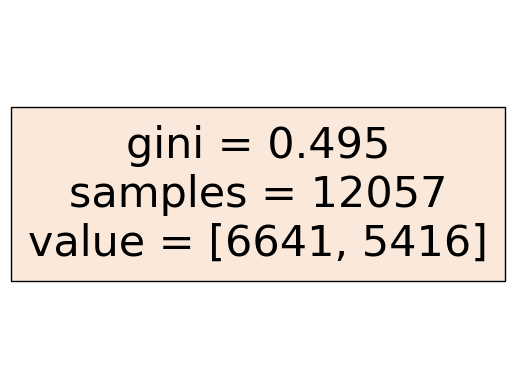

In [23]:
#plt.figure(figure=(10,10))
plot_tree(clf, filled=True)
plt.show()

In [24]:
test_pred = clf.predict(X_test)

In [25]:
clf.score(X_test, y_test)

0.5538971807628524

In [26]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, test_pred, average='weighted')

# Print the F1 score. It is a harmonic mean of precision and recall given by- F1 = 2*Precision*Recall/(Precision + Recall)
print(f"F1 score: {f1:.2f}")

F1 score: 0.39


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(X_test))

array([[1670,    0],
       [1345,    0]])

Questions for Nik:
How does the above look?

- right now, I am overclassifying, look at predict probab, play with manual calculation with confusion matrix. get all row probabilities in predict proba, 
- try to get a better confusion matrix by improving models (generate synthetic data for positives and negatives)
-different models (cut-boost, gradient boost)
Can you elaborate further on F1, ROC-AUC score, log-loss

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
predictions = knn.predict_proba(X_test)
print(predictions)

[[0.6 0.4]
 [0.6 0.4]
 [0.8 0.2]
 ...
 [0.2 0.8]
 [0.8 0.2]
 [0.2 0.8]]


In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [31]:
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

# Fit train data to GBC

gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [32]:
print(confusion_matrix(y_test, gbc.predict(X_test)))

[[1403  267]
 [1027  318]]


In [33]:
print(accuracy_score( 
     y_test, gbc.predict(X_test)))

0.5708126036484246


In [34]:
pred=gbc.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.58      0.84      0.68      1670
           1       0.54      0.24      0.33      1345

    accuracy                           0.57      3015
   macro avg       0.56      0.54      0.51      3015
weighted avg       0.56      0.57      0.53      3015



In [36]:
from sklearn.model_selection import GridSearchCV

grid = {

    'learning_rate':[0.01,0.05,0.1],

    'n_estimators':np.arange(100,500,100),

}


gb = GradientBoostingClassifier()

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'learning_rate': 0.05, 'n_estimators': 300}
Train Score: 0.5569380480917685
Test Score: 0.566832504145937


In [37]:
grid = {'max_depth':[2,3,4,5,6,7] }

gb = GradientBoostingClassifier(learning_rate=0.1,n_estimators=400)

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'max_depth': 2}
Train Score: 0.5541175454292352
Test Score: 0.5635157545605307


In [38]:
import catboost as ctb
from sklearn import metrics

In [39]:
model_CBC = ctb.CatBoostClassifier()
model_CBC.fit(X_train, y_train)
print(model_CBC)

Learning rate set to 0.029828
0:	learn: 0.6927038	total: 67.4ms	remaining: 1m 7s
1:	learn: 0.6922306	total: 72.6ms	remaining: 36.2s
2:	learn: 0.6917004	total: 78.8ms	remaining: 26.2s
3:	learn: 0.6912653	total: 83.9ms	remaining: 20.9s
4:	learn: 0.6908006	total: 88.5ms	remaining: 17.6s
5:	learn: 0.6904243	total: 92.5ms	remaining: 15.3s
6:	learn: 0.6900395	total: 96.2ms	remaining: 13.6s
7:	learn: 0.6896855	total: 99.9ms	remaining: 12.4s
8:	learn: 0.6893457	total: 103ms	remaining: 11.4s
9:	learn: 0.6888898	total: 107ms	remaining: 10.5s
10:	learn: 0.6885931	total: 110ms	remaining: 9.87s
11:	learn: 0.6882336	total: 113ms	remaining: 9.3s
12:	learn: 0.6879725	total: 116ms	remaining: 8.8s
13:	learn: 0.6876142	total: 119ms	remaining: 8.35s
14:	learn: 0.6873044	total: 121ms	remaining: 7.96s
15:	learn: 0.6869833	total: 124ms	remaining: 7.63s
16:	learn: 0.6867433	total: 127ms	remaining: 7.33s
17:	learn: 0.6864552	total: 129ms	remaining: 7.05s
18:	learn: 0.6862823	total: 132ms	remaining: 6.79s
19:	l

257:	learn: 0.6617955	total: 594ms	remaining: 1.71s
258:	learn: 0.6617119	total: 596ms	remaining: 1.71s
259:	learn: 0.6616371	total: 598ms	remaining: 1.7s
260:	learn: 0.6615813	total: 600ms	remaining: 1.7s
261:	learn: 0.6615054	total: 602ms	remaining: 1.7s
262:	learn: 0.6614471	total: 604ms	remaining: 1.69s
263:	learn: 0.6613895	total: 606ms	remaining: 1.69s
264:	learn: 0.6613220	total: 607ms	remaining: 1.68s
265:	learn: 0.6612392	total: 609ms	remaining: 1.68s
266:	learn: 0.6611920	total: 612ms	remaining: 1.68s
267:	learn: 0.6611417	total: 613ms	remaining: 1.67s
268:	learn: 0.6610061	total: 615ms	remaining: 1.67s
269:	learn: 0.6609526	total: 617ms	remaining: 1.67s
270:	learn: 0.6608776	total: 619ms	remaining: 1.67s
271:	learn: 0.6608402	total: 621ms	remaining: 1.66s
272:	learn: 0.6607933	total: 623ms	remaining: 1.66s
273:	learn: 0.6607009	total: 625ms	remaining: 1.66s
274:	learn: 0.6606524	total: 627ms	remaining: 1.65s
275:	learn: 0.6605645	total: 629ms	remaining: 1.65s
276:	learn: 0.6

456:	learn: 0.6458700	total: 993ms	remaining: 1.18s
457:	learn: 0.6457885	total: 996ms	remaining: 1.18s
458:	learn: 0.6457193	total: 998ms	remaining: 1.18s
459:	learn: 0.6456341	total: 999ms	remaining: 1.17s
460:	learn: 0.6455763	total: 1s	remaining: 1.17s
461:	learn: 0.6454821	total: 1s	remaining: 1.17s
462:	learn: 0.6454067	total: 1s	remaining: 1.17s
463:	learn: 0.6453104	total: 1.01s	remaining: 1.16s
464:	learn: 0.6452490	total: 1.01s	remaining: 1.16s
465:	learn: 0.6451524	total: 1.01s	remaining: 1.16s
466:	learn: 0.6450966	total: 1.01s	remaining: 1.16s
467:	learn: 0.6450047	total: 1.01s	remaining: 1.15s
468:	learn: 0.6449253	total: 1.02s	remaining: 1.15s
469:	learn: 0.6448497	total: 1.02s	remaining: 1.15s
470:	learn: 0.6447885	total: 1.02s	remaining: 1.15s
471:	learn: 0.6446983	total: 1.02s	remaining: 1.14s
472:	learn: 0.6445876	total: 1.02s	remaining: 1.14s
473:	learn: 0.6445233	total: 1.03s	remaining: 1.14s
474:	learn: 0.6444715	total: 1.03s	remaining: 1.14s
475:	learn: 0.6444321

650:	learn: 0.6317890	total: 1.39s	remaining: 747ms
651:	learn: 0.6317200	total: 1.39s	remaining: 745ms
652:	learn: 0.6316610	total: 1.4s	remaining: 742ms
653:	learn: 0.6316206	total: 1.4s	remaining: 740ms
654:	learn: 0.6315314	total: 1.4s	remaining: 738ms
655:	learn: 0.6314147	total: 1.4s	remaining: 735ms
656:	learn: 0.6313485	total: 1.4s	remaining: 733ms
657:	learn: 0.6312844	total: 1.41s	remaining: 731ms
658:	learn: 0.6312025	total: 1.41s	remaining: 729ms
659:	learn: 0.6311573	total: 1.41s	remaining: 726ms
660:	learn: 0.6310966	total: 1.41s	remaining: 724ms
661:	learn: 0.6310288	total: 1.41s	remaining: 722ms
662:	learn: 0.6309738	total: 1.42s	remaining: 720ms
663:	learn: 0.6309263	total: 1.42s	remaining: 717ms
664:	learn: 0.6308291	total: 1.42s	remaining: 715ms
665:	learn: 0.6307433	total: 1.42s	remaining: 713ms
666:	learn: 0.6306754	total: 1.42s	remaining: 711ms
667:	learn: 0.6306439	total: 1.43s	remaining: 708ms
668:	learn: 0.6305408	total: 1.43s	remaining: 706ms
669:	learn: 0.630

838:	learn: 0.6196477	total: 1.79s	remaining: 344ms
839:	learn: 0.6195839	total: 1.79s	remaining: 342ms
840:	learn: 0.6195187	total: 1.8s	remaining: 340ms
841:	learn: 0.6194821	total: 1.8s	remaining: 338ms
842:	learn: 0.6194508	total: 1.8s	remaining: 335ms
843:	learn: 0.6194144	total: 1.8s	remaining: 333ms
844:	learn: 0.6193548	total: 1.8s	remaining: 331ms
845:	learn: 0.6193059	total: 1.81s	remaining: 329ms
846:	learn: 0.6192560	total: 1.81s	remaining: 327ms
847:	learn: 0.6191853	total: 1.81s	remaining: 325ms
848:	learn: 0.6191082	total: 1.81s	remaining: 322ms
849:	learn: 0.6190592	total: 1.81s	remaining: 320ms
850:	learn: 0.6189714	total: 1.82s	remaining: 318ms
851:	learn: 0.6189347	total: 1.82s	remaining: 316ms
852:	learn: 0.6188171	total: 1.82s	remaining: 314ms
853:	learn: 0.6187506	total: 1.82s	remaining: 312ms
854:	learn: 0.6186522	total: 1.82s	remaining: 309ms
855:	learn: 0.6185827	total: 1.83s	remaining: 307ms
856:	learn: 0.6185363	total: 1.83s	remaining: 305ms
857:	learn: 0.618

In [40]:
expected_y  = y_test
predicted_y = model_CBC.predict(X_test)

In [41]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.58      0.77      0.66      1670
           1       0.51      0.30      0.38      1345

    accuracy                           0.56      3015
   macro avg       0.54      0.53      0.52      3015
weighted avg       0.55      0.56      0.53      3015

[[1281  389]
 [ 944  401]]


In [42]:
model_CBR = ctb.CatBoostRegressor()
model_CBR.fit(X_train, y_train)
print(model_CBR)

Learning rate set to 0.060676
0:	learn: 0.4972471	total: 3.76ms	remaining: 3.76s
1:	learn: 0.4970446	total: 6.27ms	remaining: 3.13s
2:	learn: 0.4967707	total: 8.28ms	remaining: 2.75s
3:	learn: 0.4965322	total: 10.1ms	remaining: 2.51s
4:	learn: 0.4963955	total: 12.3ms	remaining: 2.46s
5:	learn: 0.4962497	total: 14.2ms	remaining: 2.35s
6:	learn: 0.4961170	total: 16.6ms	remaining: 2.36s
7:	learn: 0.4960209	total: 17.9ms	remaining: 2.22s
8:	learn: 0.4958647	total: 20.1ms	remaining: 2.21s
9:	learn: 0.4957023	total: 22.2ms	remaining: 2.19s
10:	learn: 0.4955323	total: 24ms	remaining: 2.16s
11:	learn: 0.4953821	total: 26ms	remaining: 2.14s
12:	learn: 0.4952408	total: 27.7ms	remaining: 2.11s
13:	learn: 0.4951349	total: 29.5ms	remaining: 2.08s
14:	learn: 0.4949620	total: 31.3ms	remaining: 2.05s
15:	learn: 0.4947798	total: 32.9ms	remaining: 2.02s
16:	learn: 0.4946562	total: 34.5ms	remaining: 2s
17:	learn: 0.4945209	total: 36.1ms	remaining: 1.97s
18:	learn: 0.4944074	total: 37.8ms	remaining: 1.95s

167:	learn: 0.4836199	total: 195ms	remaining: 965ms
168:	learn: 0.4835348	total: 196ms	remaining: 964ms
169:	learn: 0.4834530	total: 197ms	remaining: 961ms
170:	learn: 0.4833472	total: 198ms	remaining: 959ms
171:	learn: 0.4832781	total: 199ms	remaining: 958ms
172:	learn: 0.4832477	total: 200ms	remaining: 955ms
173:	learn: 0.4831985	total: 201ms	remaining: 953ms
174:	learn: 0.4830962	total: 202ms	remaining: 950ms
175:	learn: 0.4829969	total: 202ms	remaining: 948ms
176:	learn: 0.4829123	total: 204ms	remaining: 946ms
177:	learn: 0.4828539	total: 204ms	remaining: 944ms
178:	learn: 0.4827723	total: 205ms	remaining: 942ms
179:	learn: 0.4827012	total: 206ms	remaining: 940ms
180:	learn: 0.4826561	total: 207ms	remaining: 937ms
181:	learn: 0.4825874	total: 208ms	remaining: 935ms
182:	learn: 0.4825259	total: 209ms	remaining: 933ms
183:	learn: 0.4824200	total: 210ms	remaining: 931ms
184:	learn: 0.4823110	total: 211ms	remaining: 929ms
185:	learn: 0.4822211	total: 212ms	remaining: 928ms
186:	learn: 

351:	learn: 0.4721948	total: 391ms	remaining: 720ms
352:	learn: 0.4721572	total: 392ms	remaining: 719ms
353:	learn: 0.4720804	total: 393ms	remaining: 717ms
354:	learn: 0.4720331	total: 394ms	remaining: 716ms
355:	learn: 0.4719883	total: 395ms	remaining: 714ms
356:	learn: 0.4719179	total: 396ms	remaining: 713ms
357:	learn: 0.4718662	total: 397ms	remaining: 711ms
358:	learn: 0.4718450	total: 397ms	remaining: 710ms
359:	learn: 0.4717613	total: 399ms	remaining: 709ms
360:	learn: 0.4717148	total: 400ms	remaining: 707ms
361:	learn: 0.4716574	total: 401ms	remaining: 706ms
362:	learn: 0.4715926	total: 401ms	remaining: 704ms
363:	learn: 0.4715523	total: 402ms	remaining: 703ms
364:	learn: 0.4715228	total: 403ms	remaining: 702ms
365:	learn: 0.4714767	total: 404ms	remaining: 700ms
366:	learn: 0.4714510	total: 405ms	remaining: 699ms
367:	learn: 0.4714228	total: 406ms	remaining: 697ms
368:	learn: 0.4713853	total: 407ms	remaining: 696ms
369:	learn: 0.4713119	total: 408ms	remaining: 694ms
370:	learn: 

532:	learn: 0.4634635	total: 588ms	remaining: 515ms
533:	learn: 0.4634490	total: 589ms	remaining: 514ms
534:	learn: 0.4634043	total: 590ms	remaining: 513ms
535:	learn: 0.4633969	total: 591ms	remaining: 512ms
536:	learn: 0.4633659	total: 592ms	remaining: 510ms
537:	learn: 0.4633288	total: 593ms	remaining: 509ms
538:	learn: 0.4632963	total: 594ms	remaining: 508ms
539:	learn: 0.4632580	total: 594ms	remaining: 506ms
540:	learn: 0.4632177	total: 595ms	remaining: 505ms
541:	learn: 0.4631756	total: 596ms	remaining: 504ms
542:	learn: 0.4631282	total: 597ms	remaining: 503ms
543:	learn: 0.4630663	total: 598ms	remaining: 501ms
544:	learn: 0.4630310	total: 599ms	remaining: 500ms
545:	learn: 0.4629716	total: 600ms	remaining: 499ms
546:	learn: 0.4629345	total: 601ms	remaining: 498ms
547:	learn: 0.4628803	total: 603ms	remaining: 497ms
548:	learn: 0.4628181	total: 604ms	remaining: 496ms
549:	learn: 0.4627921	total: 605ms	remaining: 495ms
550:	learn: 0.4627316	total: 606ms	remaining: 494ms
551:	learn: 

713:	learn: 0.4559508	total: 785ms	remaining: 314ms
714:	learn: 0.4558754	total: 786ms	remaining: 313ms
715:	learn: 0.4558464	total: 787ms	remaining: 312ms
716:	learn: 0.4558202	total: 788ms	remaining: 311ms
717:	learn: 0.4557622	total: 789ms	remaining: 310ms
718:	learn: 0.4557347	total: 790ms	remaining: 309ms
719:	learn: 0.4556978	total: 791ms	remaining: 307ms
720:	learn: 0.4556625	total: 792ms	remaining: 306ms
721:	learn: 0.4556373	total: 793ms	remaining: 305ms
722:	learn: 0.4556078	total: 794ms	remaining: 304ms
723:	learn: 0.4555794	total: 794ms	remaining: 303ms
724:	learn: 0.4555400	total: 795ms	remaining: 302ms
725:	learn: 0.4554833	total: 796ms	remaining: 301ms
726:	learn: 0.4554167	total: 797ms	remaining: 299ms
727:	learn: 0.4553773	total: 798ms	remaining: 298ms
728:	learn: 0.4553561	total: 799ms	remaining: 297ms
729:	learn: 0.4553291	total: 800ms	remaining: 296ms
730:	learn: 0.4553099	total: 801ms	remaining: 295ms
731:	learn: 0.4552623	total: 802ms	remaining: 294ms
732:	learn: 

894:	learn: 0.4491904	total: 982ms	remaining: 115ms
895:	learn: 0.4491471	total: 983ms	remaining: 114ms
896:	learn: 0.4491038	total: 984ms	remaining: 113ms
897:	learn: 0.4490198	total: 984ms	remaining: 112ms
898:	learn: 0.4489900	total: 985ms	remaining: 111ms
899:	learn: 0.4489511	total: 986ms	remaining: 110ms
900:	learn: 0.4489397	total: 987ms	remaining: 108ms
901:	learn: 0.4488820	total: 988ms	remaining: 107ms
902:	learn: 0.4488713	total: 989ms	remaining: 106ms
903:	learn: 0.4488118	total: 990ms	remaining: 105ms
904:	learn: 0.4487642	total: 991ms	remaining: 104ms
905:	learn: 0.4487243	total: 992ms	remaining: 103ms
906:	learn: 0.4486990	total: 993ms	remaining: 102ms
907:	learn: 0.4486497	total: 994ms	remaining: 101ms
908:	learn: 0.4486415	total: 995ms	remaining: 99.6ms
909:	learn: 0.4485922	total: 996ms	remaining: 98.5ms
910:	learn: 0.4485344	total: 997ms	remaining: 97.4ms
911:	learn: 0.4484985	total: 998ms	remaining: 96.3ms
912:	learn: 0.4484532	total: 999ms	remaining: 95.2ms
913:	le

In [43]:
expected_y  = y_test
predicted_y = model_CBR.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stars_class'>

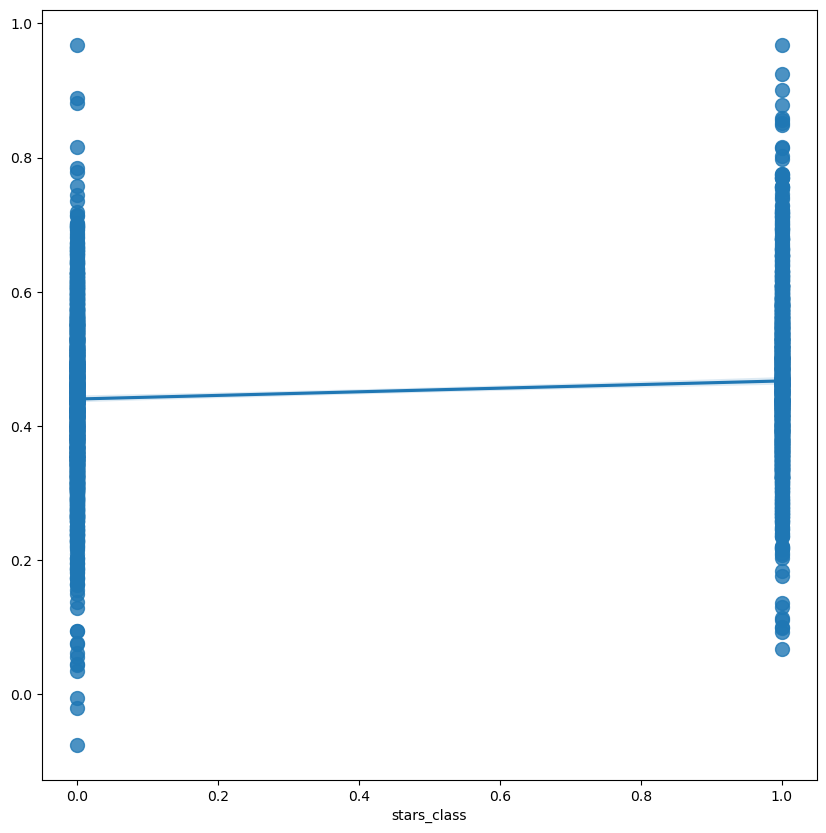

In [44]:
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})